---
# **Financial Data Structures**

---

# Preliminaries

## Libraries

In [140]:
# Imports libraries

# Import functions from RiskLabAI
from RiskLabAI.controller import Controller
from RiskLabAI.data.structures.data_structures_lopez import *
from RiskLabAI.utils import *

from RiskLabAI.data.structures.imbalance_bars import ExpectedImbalanceBars, FixedImbalanceBars
from RiskLabAI.data.structures.run_bars import ExpectedRunBars, FixedRunBars
from RiskLabAI.data.structures.standard_bars import StandardBars
from RiskLabAI.data.structures.time_bars import TimeBars

from RiskLabAI.utils.constants import CUMULATIVE_DOLLAR, CUMULATIVE_VOLUME, CUMULATIVE_TICKS



import plotly.graph_objects as go
from openpyxl import load_workbook
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Set plotting backend and handle numpy errors
pd.options.plotting.backend = "plotly"
np.seterr(divide='ignore', invalid='ignore')


import datetime
import time
import sys
from statsmodels.stats import stattools
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import requests

# !pip3 install dtale
import dtale

# Path to save the Excel file
excel_file_path = "structure.xlsx"

# Initialize the Excel file
wb = load_workbook(excel_file_path) if os.path.exists(excel_file_path) else None

## Data Import and Initial Processing

In [199]:
dir = "https://raw.githubusercontent.com/risk-labratory/data/main/"
url = dir + "IVE_2020.csv"

dataframe = pd.read_csv(url, header=0)
dataframe['dates'] = pd.to_datetime(dataframe['dates'])
dataframe.set_index('dates', inplace=True, drop=True)
dataframe.drop_duplicates(inplace=True)
dataframe = dataframe[(dataframe.index.hour >= 9) & (dataframe.index.hour < 16)]
dataframe.head()


,price,bid,ask,size
dates,,,,
2020-01-02 09:30:00,130.68,130.59,130.60,20625
2020-01-02 09:30:01,130.50,130.50,130.77,200
2020-01-02 09:30:04,130.53,130.52,130.78,100
2020-01-02 09:30:04,130.55,130.52,130.78,100
2020-01-02 09:30:04,130.53,130.52,130.78,200


# Analytics

## Bars

### Standard Bars

##### Time Bars

In [111]:
ohlcvTime = generate_time_bar(dataframe, frequency = "30Min")
ohlcvTime.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.7800,130.3700,130.4299,164048,130.585010,130.558158,262,NaN
2020-01-02 10:00:00,130.4000,130.4000,130.0218,130.0564,75227,130.141558,130.178844,132,-0.002910
2020-01-02 10:30:00,130.0800,130.2000,129.9713,130.2000,91006,130.079069,130.056870,124,-0.000937
2020-01-02 11:00:00,130.2050,130.2089,130.0800,130.1300,65182,130.141968,130.138222,64,0.000625
2020-01-02 11:30:00,130.0833,130.0833,129.9380,130.0300,84253,130.013381,130.016007,59,-0.000940
2020-01-02 12:00:00,130.0215,130.1179,129.9800,130.0732,59420,130.063977,130.075780,60,0.000460
2020-01-02 12:30:00,130.0945,130.1348,130.0420,130.0773,152349,130.084798,130.073998,125,-0.000014
2020-01-02 13:00:00,130.0700,130.0700,129.9566,129.9566,16861,129.995596,129.990660,45,-0.000641
2020-01-02 13:30:00,129.9799,130.0200,129.9400,129.9779,64199,129.969085,129.969793,81,-0.000161


##### Tick Bars

In [112]:
timeBarLen = ohlcvTime.shape[0]
ohlcvTick = generate_tick_bar(dataframe, ticks_per_bar = 0, number_bars = timeBarLen)
ohlcvTick.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.680,130.7800,130.5000,130.7800,23625,130.672466,130.607500,16,NaN
2020-01-02 09:30:05,130.780,130.7800,130.5200,130.6650,8446,130.647502,130.676562,16,0.000529
2020-01-02 09:30:29,130.660,130.7049,130.6000,130.6200,1982,130.649491,130.647181,16,-0.000225
2020-01-02 09:32:12,130.620,130.6200,130.5600,130.5700,5200,130.574894,130.579031,16,-0.000522
2020-01-02 09:32:51,130.570,130.6100,130.5567,130.5900,5721,130.589296,130.586669,16,0.000058
2020-01-02 09:33:04,130.590,130.6300,130.5900,130.6242,52946,130.609491,130.611506,16,0.000190
2020-01-02 09:33:32,130.640,130.6700,130.5350,130.5500,5886,130.589667,130.604900,16,-0.000051
2020-01-02 09:35:05,130.550,130.5900,130.4800,130.5600,3614,130.536972,130.544238,16,-0.000465
2020-01-02 09:35:54,130.570,130.6200,130.5000,130.5000,5021,130.549199,130.551112,16,0.000053


##### Volume Bars

In [6]:
ohlcvVolume = generate_volume_bar(dataframe, volume_per_bar = 0, number_bars = timeBarLen)
ohlcvVolume.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.6800,130.5000,130.5300,21225,130.675571,130.558000,5,NaN
2020-01-02 09:30:04,130.5400,130.7800,130.5200,130.7800,5913,130.716073,130.664444,18,0.000815
2020-01-02 09:30:12,130.5200,130.7400,130.5200,130.5700,8315,130.587541,130.632637,32,-0.000243
2020-01-02 09:32:50,130.5700,130.5900,130.5567,130.5900,6921,130.575836,130.576668,19,-0.000429
2020-01-02 09:33:04,130.6100,130.6200,130.5900,130.6200,6400,130.599844,130.602667,15,0.000199
2020-01-02 09:33:22,130.6100,130.6700,130.5980,130.6700,50546,130.611426,130.637436,14,0.000266
2020-01-02 09:34:09,130.6295,130.6295,130.5350,130.5400,6286,130.566144,130.564275,16,-0.000560
2020-01-02 09:35:17,130.4978,130.6200,130.4500,130.4900,7975,130.531469,130.528919,32,-0.000271
2020-01-02 09:39:53,130.5100,130.5600,130.5100,130.5300,7089,130.530707,130.530645,31,0.000013


##### Dollar Bars

In [8]:
ohlcvDollar = generate_dollar_bar(dataframe, dollar_per_bar = 0, number_bars = timeBarLen)
ohlcvDollar.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.78,130.5000,130.67,24225,130.674262,130.631500,20,NaN
2020-01-02 09:30:05,130.6700,130.78,130.5200,130.52,4846,130.669480,130.660000,4,0.000218
2020-01-02 09:30:12,130.5200,130.74,130.5200,130.59,7182,130.604879,130.629840,35,-0.000231
2020-01-02 09:32:50,130.5700,130.59,130.5567,130.59,6121,130.575292,130.575780,15,-0.000414
2020-01-02 09:33:04,130.6100,130.61,130.5900,130.61,6100,130.599180,130.600769,13,0.000191
2020-01-02 09:33:19,130.6100,130.62,130.6100,130.62,300,130.613333,130.615000,2,0.000109
2020-01-02 09:33:22,130.6100,130.63,130.6100,130.63,48100,130.610042,130.620000,2,0.000038
2020-01-02 09:33:23,130.6300,130.67,130.5350,130.55,5832,130.602522,130.611625,20,-0.000064
2020-01-02 09:35:05,130.5500,130.62,130.4800,130.55,5465,130.545136,130.553600,23,-0.000444


#### Stability

In [189]:
countAverage = pd.DataFrame()
countAverage['time'] = ohlcvTime.resample("1W")['tick_count'].mean()
countAverage['tick'] = ohlcvTick.resample("1W")['tick_count'].mean()
countAverage['volume'] = ohlcvVolume.resample("1W")['tick_count'].mean()
countAverage['dollar'] = ohlcvDollar.resample("1W")['tick_count'].mean()
countAverage.head(10)

,time,tick,volume,dollar
dates,,,,
2020-01-05,13.676301,16.0,13.917647,11.889447
2020-01-12,11.848214,16.0,16.518672,14.067138
2020-01-19,12.035714,16.0,19.536232,16.850000
2020-01-26,9.526786,16.0,17.788889,15.247619
2020-02-02,15.601190,16.0,20.552941,17.826531
2020-02-09,11.348214,16.0,17.652778,15.627049
2020-02-16,7.669643,16.0,18.539568,15.907407
2020-02-23,7.125000,16.0,17.873134,15.653595
2020-03-01,45.872024,16.0,23.860681,22.469388


In [192]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.time, name='Time'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.tick, name='Tick'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.volume, name='Volume'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.dollar, name='Dollar'))

# Use the function to update layout
update_figure_layout(
    fig,
    title="Standard Bars Frequency",
    xaxis_title="Date",
    yaxis_title="Frequency"
)
# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    countAverage.to_excel(writer, sheet_name='Standard Bars Frequency')

# Show the plot
fig.show()

#### Normality

##### Jarque-Bera Test

In [17]:
time = ohlcvTime
time

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.7800,130.3700,130.4299,164048,130.585010,130.558158,262,NaN
2020-01-02 10:00:00,130.4000,130.4000,130.0218,130.0564,75227,130.141558,130.178844,132,-0.002910
2020-01-02 10:30:00,130.0800,130.2000,129.9713,130.2000,91006,130.079069,130.056870,124,-0.000937
2020-01-02 11:00:00,130.2050,130.2089,130.0800,130.1300,65182,130.141968,130.138222,64,0.000625
2020-01-02 11:30:00,130.0833,130.0833,129.9380,130.0300,84253,130.013381,130.016007,59,-0.000940
...,...,...,...,...,...,...,...,...,...
2020-12-31 13:30:00,127.1800,127.1800,127.0800,127.1600,12019,127.118935,127.115886,22,-0.000493
2020-12-31 14:00:00,127.1800,127.5097,127.1020,127.4760,7142,127.272049,127.280221,28,0.001292
2020-12-31 14:30:00,127.4800,127.6673,127.4706,127.5799,7409,127.580403,127.572910,21,0.002297


In [19]:
dollar_returns = np.log(ohlcvDollar['close']).diff().dropna()
volume_returns = np.log(ohlcvVolume['close']).diff().dropna()
tick_returns = np.log(ohlcvTick['close']).diff().dropna()
time_returns = np.log(ohlcvTime['open']).diff().dropna()

In [20]:
int(stats.jarque_bera(time_returns)[0])

20012

In [21]:
int(stats.jarque_bera(dollar_returns)[0])

39830433

In [22]:
int(stats.jarque_bera(volume_returns)[0])

41658693

In [23]:
int(stats.jarque_bera(tick_returns)[0])

109535886

##### Shapiro-Wilk Test

In [19]:
stats.shapiro(time_returns)

ShapiroResult(statistic=0.8194435066632015, pvalue=7.536603441603108e-56)

In [20]:
stats.shapiro(dollar_returns)

ShapiroResult(statistic=0.8644461473683926, pvalue=1.8213710646849913e-43)

In [21]:
stats.shapiro(volume_returns)

ShapiroResult(statistic=0.8705724699754638, pvalue=3.1273579417782573e-45)

In [22]:
stats.shapiro(tick_returns)

ShapiroResult(statistic=0.8880392136294855, pvalue=9.462879247108947e-42)

#### Results KDE plot 

##### Standardize Data

In [194]:
time_standard = (time_returns - time_returns.mean()) / time_returns.std()
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (volume_returns - volume_returns.mean()) / volume_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()


##### Distribution Plot

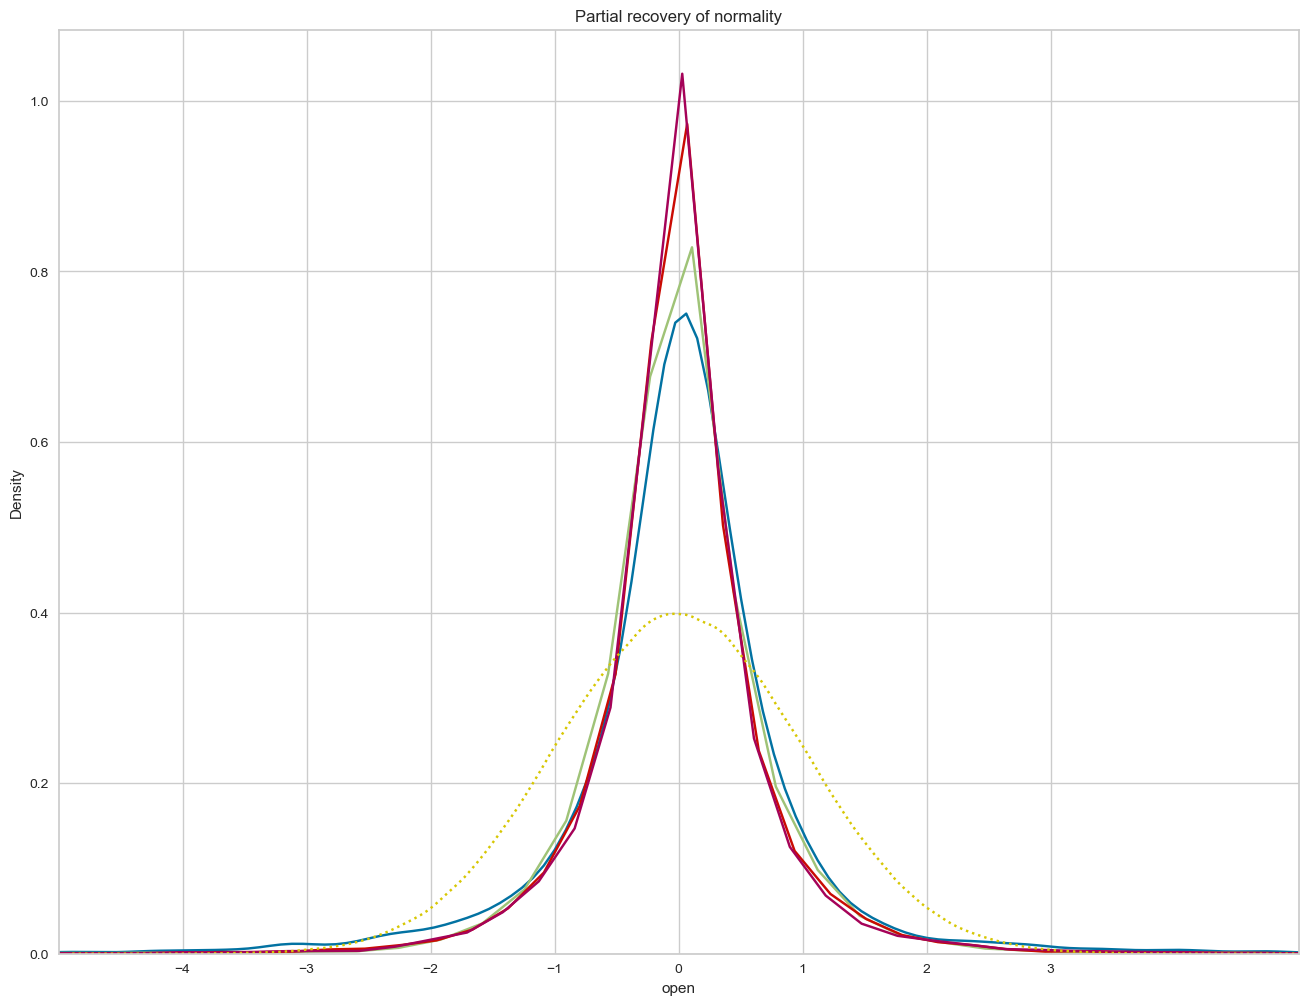

In [195]:
plt.figure(figsize=(16, 12))
sns.kdeplot(time_standard, label="Time",)
sns.kdeplot(tick_standard, label="Tick",)
sns.kdeplot(volume_standard, label="Volume",)
sns.kdeplot(dollar_standard, label="Dollar",)
sns.kdeplot(np.random.normal(size=1000000), label="Normal", linestyle="dotted")
plt.xticks(range(-4, +4))
plt.title(
    'Partial recovery of normality',
    loc='center', 
)
plt.xlim(-5, 5)

# Show the plot
plt.show()

### Information-Driven Bars

In [175]:
dataframe['label'] = dataframe['price']
dataframe['volume_labeled'] = dataframe['size']
dataframe['dollarslabeled'] = dataframe['price'] * dataframe['size']


#### Imbalance Tick Bar

In [170]:
imbalance_tick_bar, thetas_absolute_tick, thresholds_tick = generate_information_driven_bars(dataframe, bar_type="tick", tick_expected_initial=0)

# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_tick_bar.to_excel(writer, sheet_name='imbalance tick bar')

imbalance_tick_bar

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.68,130.68,130.50,130.50,20825,130.678271,130.590000,2,NaN
2020-01-02 09:30:04,130.53,130.55,130.53,130.55,200,130.540000,130.540000,2,-0.000383
2020-01-02 09:30:04,130.53,130.54,130.53,130.54,300,130.533333,130.535000,2,-0.000038
2020-01-02 09:30:04,130.53,130.53,130.52,130.52,400,130.527500,130.525000,2,-0.000077
2020-01-02 09:30:04,130.52,130.53,130.52,130.53,600,130.526667,130.525000,2,0.000000
...,...,...,...,...,...,...,...,...,...
2020-12-31 15:58:04,128.10,128.13,128.08,128.12,3165,128.095406,128.106364,11,0.000387
2020-12-31 15:59:06,128.13,128.17,128.09,128.11,1636,128.127775,128.132727,11,0.000206
2020-12-31 15:59:37,128.10,128.20,128.10,128.13,1367,128.163702,128.167273,11,0.000270


#### Imbalance Volume Bar

In [179]:
imbalance_volume_bar, thetas_absolute_volume, thresholds_volume = generate_information_driven_bars(dataframe, bar_type="volume", tick_expected_initial=0)

# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_volume_bar.to_excel(writer, sheet_name='imbalance volume bar')

imbalance_volume_bar

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.680,130.68,130.500,130.5000,20825,130.678271,130.590000,2,NaN
2020-01-02 09:30:04,130.530,130.78,130.520,130.5900,20949,130.618879,130.622269,71,0.000247
2020-01-02 09:33:00,130.590,130.67,129.938,130.2400,1131256,130.137731,130.156657,1127,-0.003571
2020-01-02 15:13:31,130.225,132.10,122.250,122.8995,13704373,129.324374,129.029767,32108,-0.008696
2020-02-26 12:04:47,122.835,128.65,81.700,128.0200,110035846,108.395944,107.180331,250062,-0.185530


#### Imbalance Dollar Bar

In [176]:
imbalance_dollar_bar, thetas_absolute_dollar, thresholds_dollar = generate_information_driven_bars(dataframe, bar_type="dollar", tick_expected_initial=0)

 # Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_dollar_bar.to_excel(writer, sheet_name='imbalance dollar bar')

imbalance_dollar_bar

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.680,130.68,130.500,130.50,20825,130.678271,130.590000,2,NaN
2020-01-02 09:30:04,130.530,130.78,130.520,130.59,20949,130.618879,130.622269,71,0.000247
2020-01-02 09:33:00,130.590,130.67,129.938,130.24,1131256,130.137731,130.156657,1127,-0.003571
2020-01-02 15:13:31,130.225,132.10,121.510,121.79,13855665,129.248911,128.906634,32711,-0.009650
2020-02-26 13:46:22,121.760,128.65,81.700,128.02,109884554,108.376645,107.143662,249459,-0.184918
